In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import scipy.io as sio
from dataclasses import dataclass
from typing import List, Tuple
import os
from dotenv import load_dotenv
load_dotenv()
import tidy3d as td
from tidy3d import web
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import AutomationModule as AM
from scipy.optimize import curve_fit
from natsort import natsorted
import numpy as np
import matplotlib.animation as animation
import xarray as xr
import imageio
import matplotlib



tidy3dAPI = os.environ["API_TIDY3D_KEY"]

In [ ]:
a=5/3


In [ ]:
store_path = f"output/anderson/Plots_for_Report_20240613/d(t)_analysis"
 #Save the plot in PDF format
if not os.path.exists(store_path):
      os.makedirs(store_path)
      print(f"Folder '{store_path}' created successfully.")

In [ ]:
import h5py

def create_hdf5_from_dict(data, filename):
    with h5py.File(filename, 'w') as hdf_file:
        # Recursively traverse the dictionary and write data to the HDF5 file
        _write_dict_to_hdf5(data, hdf_file)

def _write_dict_to_hdf5(data, hdf_group):
    for key, value in data.items():
        if isinstance(value, dict):
            # If the value is a nested dictionary, create a group and call recursively
            subgroup = hdf_group.create_group(key)
            _write_dict_to_hdf5(value, subgroup)
        else:
            # If the value is not a dictionary, store it as a dataset
            hdf_group.create_dataset(key, data=value)

In [ ]:
#Compute beam diameter d(t)
import scipy.integrate


def diameter(intensity_array):
    x,y = intensity_array['x'],intensity_array['y']
    intensity = intensity_array.values
    integral_1 = scipy.integrate.trapezoid(scipy.integrate.trapezoid(intensity, x=y, axis=1), x=x, axis=0)**2
    integral_2 = scipy.integrate.trapezoid(scipy.integrate.trapezoid(intensity**2, x=y, axis=1), x=x, axis=0)

    return 2*np.sqrt((integral_1/integral_2)/np.pi)




In [ ]:
def create_movie(field_time_out, monitor_lambdas,name='',log=False):
    frames = []
    if log:
        field_log = np.log10((field_time_out))
    else:
        field_log = ((field_time_out))


    for i, time in enumerate(field_time_out):
        try:
            fig, ax = plt.subplots(figsize=(5, 5))
            pcolormesh = (field_log).isel(t=i).squeeze().plot.pcolormesh(ax=ax,cmap="plasma")
            #plt.title(f'Time: {field_time_out.t[i]}')
            plt.title(f'Time: {str(np.array(field_time_out['t'][()][i]))} ps')

            # Save the frame
            plt.savefig(f'frame_{i}.png')
            plt.close(fig)
            frames.append(f'frame_{i}.png')
        except:
            break
        

    name_movie = f'{store_path}/{name}.mp4' if name else f'output/anderson/d(t) analysis/Diameter d(t) at output of the structure Range - {monitor_lambdas[0]:.3g} - {monitor_lambdas[-1]:.3g}.mp4'
    with imageio.get_writer(name_movie, fps=2) as writer:
        for frame in frames:
            image = imageio.imread(frame)
            writer.append_data(image)

    # Optionally, remove the individual frames if no longer needed
    for frame in frames:
        os.remove(frame)

In [ ]:
#Pushes data to a h5 file 

# #a=1

# data_intensities = []
# #slices =np.array([0.1])
# slices =np.array([1.0])
# for path_direction in [
#                     #    "RCP 2 Tight pulse 36x36x(slicesx18a) 0.416-0.419 nu 7 times/z_incidence",
#                     #    "RCP Near Gap Tight pulse 0.422 nu 72x72x18/z_incidence",
#                     #    "RCP Near Gap Tight pulse 0.322 nu 72x72x18/z_incidence"
#                          # "RCP Near Gap Tight pulse 0.322 nu 90x90x18/z_incidence",
#                          # "RCP Near Gap Tight pulse 0.322 nu 90x90x18/z_incidence"
#                         #  "RCP Tight pulse 0.422 nu 90x90x11.7/z_incidence",
#                         #  "RCP Tight pulse 0.322 nu 90x90x11.7/z_incidence",
#                         # "RCP Tight pulse 0.422 nu 90x90x18/z_incidence",
#                         #  "RCP Tight pulse 0.427 nu 90x90x18/z_incidence",
#                         #  "RCP Tight pulse 0.322 nu 90x90x18/z_incidence"
#                         #"RCP Tight pulse 0.427 nu 90x90x18 No Structure/z_incidence"
#                         #"RCP Tight pulse 0.362 nu 72x72x18/z_incidence",
#                         #"RCP Tight pulse 0.442 nu 72x72x18/z_incidence"
#                         #"RCP Tight pulse 0.362 - 0.444 nu 72x72x18/z_incidence",
#                         #"RCP Tight pulse 0.362-0.372 nu 72x72x18/z_incidence"
#                         #"RCP Tight pulse 0.432-0.442 nu 72x72x18/z_incidence"
#                         "RCP Tight pulse 0.33 - 0.45 nu 72x72x18/z_incidence"
#                        ]:

#       folder_path = f"data/{path_direction}"
      

      
#       for i,filename in enumerate(natsorted(os.listdir(folder_path))):
#             print(filename)
            
            
#             if not Path(filename).suffix==".txt":
#                   continue
            
#             if os.path.isfile(os.path.join(folder_path, filename)):
#                 file=os.path.join(folder_path, filename)
#                 structure_1 = AM.loadFromFile(key = tidy3dAPI, file_path=file)
#                 print(structure_1.__str__())
#                 sim_data = structure_1.sim_data
#                 for monitor_definition in ["freq_monitorFieldOut"]:
#                   plt.figure(figsize=(15, 10))
#                   field_time_out = sim_data.get_intensity(monitor_definition)
#                   monitor_lambdas = a/(td.C_0/np.array(np.array(sim_data.simulation.monitors)[0].freqs))
#                   data_intensities={
#                             "monitor":monitor_definition,
#                             "field_freq_out":field_time_out,
#                             "freqs":field_time_out['f'],
#                             "monitor_lambdas":monitor_lambdas,
#                             "file_name":Path(filename).name,
#                             "diameter":diameter(field_time_out).squeeze()
#                          }
                  

#                   # Specify the filename for the HDF5 file
#                   fileh5 = f"{store_path}/data/{monitor_definition}_{Path(filename).name}.h5"
                        
#                   # Create the HDF5 file from the dictionary
#                   create_hdf5_from_dict(data_intensities, fileh5)         
              
#                #    name =f'Diameter_d(t)_{monitor_definition}_{Path(filename).name}'
#                #    create_movie(field_time_out,monitor_lambdas,name)

    


# del sim_data

In [ ]:
#pulls data from h5 and creates a movie
directory = r"H:\phd stuff\tidy3d\output\anderson\Plots_for_Report_20240613\d(t)_analysis\data\Output"
data_intensities = []
for k,filename in enumerate(natsorted(os.listdir(directory))):
    if not Path(filename).suffix==".h5":
        continue 
    print(filename)
    if os.path.isfile(os.path.join(directory, filename)):
        file=os.path.join(directory, filename) 
        with h5py.File(file, 'r') as f:
            size_sample = 11.7 if k < 2 else 18.01
            data_intensities += [{
                            "monitor":f["monitor"][()].decode('utf-8'),
                            "field_time_out":(f["field_time_out"])[()],
                            "times":(f["times"])[()],
                            "monitor_lambdas":(f["monitor_lambdas"])[()],
                            "file_name":f["file_name"][()].decode('utf-8'),
                            "diameter":(f["diameter"])[()],
                            "size":size_sample
                         }]
            
            field_log_da = xr.DataArray(data_intensities[k]["field_time_out"], dims=["x", "y","z","t"])
            create_movie(field_log_da,data_intensities[k]["monitor_lambdas"],f"d(t)_{size_sample}_{data_intensities[k]["monitor_lambdas"][0]:.3g}-{data_intensities[k]["monitor_lambdas"][-1]:.3g}",log=True)
            break


In [ ]:
# font = {
#         'weight' : 'bold',
#         'size'   : 27}

# matplotlib.rc('font', **font)

# plt.figure(figsize=(15, 10))
# for i,item in enumerate(data_intensities):
#         if i > 1:
#                 break
#         plt.plot(item["times"]*1e12 ,item["diameter"]/a,"o", label=f"$\\nu$' - {item["monitor_lambdas"][0]:.3g} - {item["monitor_lambdas"][-1]:.3g}")
#         plt.ylabel("d(t)(in units of a)")
#         plt.xlabel("Time[ps]")
#         plt.title(f"Diameter d(t) Output 90x90x{item["size"]}a ")
#         plt.legend()
#         plt.ylim(0,90)
#         plt.grid()
# plt.savefig(f'{store_path}/Diameter_d(t)_output_90x90x11.7a.pdf', format='pdf')



In [ ]:
# font = {
#         'weight' : 'bold',
#         'size'   : 27}

# matplotlib.rc('font', **font)

# plt.figure(figsize=(15, 10))
# for i,item in enumerate(data_intensities):
#         if i < 3:
#                 continue
#         plt.plot(item["times"]*1e12 ,item["diameter"]/a,"o", label=f"$\\nu$' - {item["monitor_lambdas"][0]:.3g} - {item["monitor_lambdas"][-1]:.3g}")
#         plt.ylabel("d(t)(in units of a)")
#         plt.xlabel("Time[ps]")
#         plt.title(f"Diameter d(t) Output 90x90x{item["size"]}a")
#         plt.legend()
#         plt.ylim(0,90)
#         plt.grid()

# plt.savefig(f'{store_path}/Diameter_d(t)_output_90x90x18.01a.pdf', format='pdf')
        


In [ ]:
# directory = r"H:\phd stuff\tidy3d\output\anderson\Plots_for_Report_20240613\d(t)_analysis\data\Center"
# data_intensities = []
# for k,filename in enumerate(natsorted(os.listdir(directory))):
#     if not Path(filename).suffix==".h5":
#         continue 
#     print(filename)
#     if os.path.isfile(os.path.join(directory, filename)):
#         file=os.path.join(directory, filename)
#         with h5py.File(file, 'r') as f:
#             size_sample = 11.7 if k < 2 else 18.01
#             data_intensities += [{
#                             "monitor":f["monitor"][()].decode('utf-8'),
#                             "field_time_out":(f["field_time_out"])[()],
#                             "times":(f["times"])[()],
#                             "monitor_lambdas":(f["monitor_lambdas"])[()],
#                             "file_name":f["file_name"][()].decode('utf-8'),
#                             "diameter":(f["diameter"])[()],
#                             "size":size_sample
#                          }]
            
#             field_log_da = xr.DataArray(data_intensities[k]["field_time_out"], dims=["x", "y","z","t"])
#             #create_movie(field_log_da,data_intensities[k]["monitor_lambdas"],f"d(t)_{size_sample}_{data_intensities[k]["monitor_lambdas"][0]:.3g}-{data_intensities[k]["monitor_lambdas"][-1]:.3g}")

# font = {
#         'weight' : 'bold',
#         'size'   : 27}

# matplotlib.rc('font', **font)

# plt.figure(figsize=(15, 10))
# for i,item in enumerate(data_intensities):
#         if i > 1:
#                 break
#         plt.plot(item["times"]*1e12 ,item["diameter"]/a,"o", label=f"$\\nu$' - {item["monitor_lambdas"][0]:.3g} - {item["monitor_lambdas"][-1]:.3g}")
#         plt.ylabel("d(t)(in units of a)")
#         plt.xlabel("Time[ps]")
#         plt.title(f"Diameter d(t) Center 90x90x{item["size"]}a ")
#         plt.legend()
#         plt.ylim(0,90)
#         plt.grid()
# #plt.savefig(f'{store_path}/Diameter_d(t)_center_90x90x11.7a.pdf', format='pdf')
# plt.show()

# plt.figure(figsize=(15, 10))
# for i,item in enumerate(data_intensities):
#         if i < 3:
#                 continue
#         plt.plot(item["times"]*1e12 ,item["diameter"]/a,"o", label=f"$\\nu$' - {item["monitor_lambdas"][0]:.3g} - {item["monitor_lambdas"][-1]:.3g}")
#         plt.ylabel("d(t)(in units of a)")
#         plt.xlabel("Time[ps]")
#         plt.title(f"Diameter d(t) Center 90x90x{item["size"]}a")
#         plt.legend()
#         plt.ylim(0,90)
#         plt.grid()

# #plt.savefig(f'{store_path}/Diameter_d(t)_center_90x90x18.01a.pdf', format='pdf')
# plt.show()        




time_monitorFieldCenter_01_Sample_600_res_L18.01_28ff_eps_eps_13_size_30_runtime_4_lambdaRange_3.9-3.89_incidence_z.txt.h5


C:\Users\HernandF\AppData\Local\Temp\ipykernel_15896\1351274863.py:27: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(frame)
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (500, 500) to (512, 512) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


time_monitorFieldOut_01_Sample_600_res_L18.01_28ff_eps_eps_13_size_30_runtime_4_lambdaRange_3.9-3.89_incidence_z.txt.h5


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (500, 500) to (512, 512) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


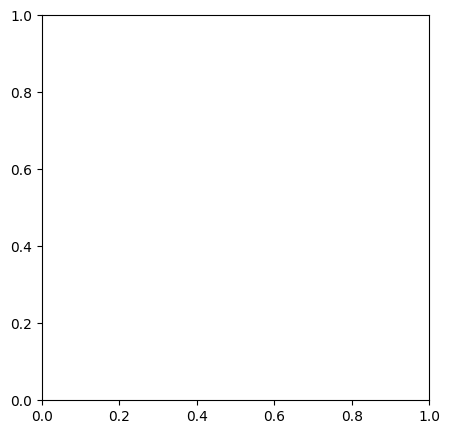

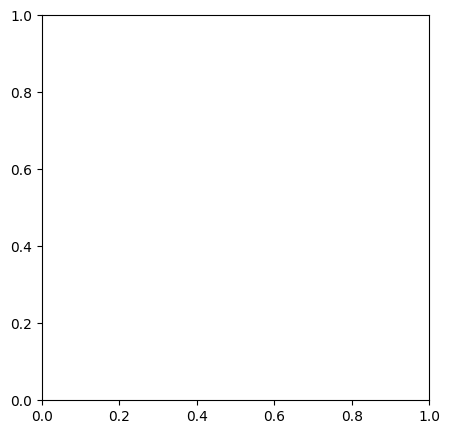

In [17]:
directory = r"H:\phd stuff\tidy3d\output\anderson\Plots_for_Report_20240613\d(t)_analysis\data\Empty"
data_intensities = []
for k,filename in enumerate(natsorted(os.listdir(directory))):
    if not Path(filename).suffix==".h5":
        continue 
    print(filename)
    if os.path.isfile(os.path.join(directory, filename)):
        file=os.path.join(directory, filename)
        with h5py.File(file, 'r') as f:
            size_sample = 18.01
            coords_xy = np.linspace(-36,36,np.shape((f["field_time_out"])[()])[0])
            field_log_da = xr.DataArray((f["field_time_out"])[()], coords={"t": (f["times"])[()]*1e12,"x":coords_xy,"y":coords_xy,"z":0}, dims=["x", "y", "z", "t"])
            data_intensities += [{
                            "monitor":f["monitor"][()].decode('utf-8'),
                            "field_time_out":(f["field_time_out"])[()],
                            "times":(f["times"])[()],
                            "monitor_lambdas":(f["monitor_lambdas"])[()],
                            "file_name":f["file_name"][()].decode('utf-8'),
                            "diameter":(f["diameter"])[()],
                            "size":size_sample
                         }]
            
            create_movie(field_log_da,data_intensities[k]["monitor_lambdas"],f"Empty Space Linear d(t)_{size_sample}_{data_intensities[k]["monitor_lambdas"][0]:.3g}-{data_intensities[k]["monitor_lambdas"][-1]:.3g}")

# font = {
#         'weight' : 'bold',
#         'size'   : 27}

# matplotlib.rc('font', **font)

# labels = ["Center", "Output"]
# plt.figure(figsize=(15, 10))
# for i,item in enumerate(data_intensities):
#         plt.plot(item["times"]*1e12 ,item["diameter"]/a,"o", label = labels[i])
#         plt.ylabel("d(t)(in units of a)")
#         plt.xlabel("Time[ps]")
#         plt.title(f"d(t) No Structure 90x90x18a $\\nu$' - {item["monitor_lambdas"][0]:.3g} - {item["monitor_lambdas"][-1]:.3g}")
#         plt.legend()
#         plt.ylim(0,90)
#         plt.grid()

# plt.savefig(f'{store_path}/Diameter_d(t)_No_Structure_90x90x18.01a.pdf', format='pdf')
# plt.show()        




In [ ]:
def calculate_sigma(intensity_array):
    x1,y1 = intensity_array['x'],intensity_array['y']
    x,y = np.meshgrid(x1,y1)
    rho_squared = x**2 + y**2
    sigma_squared=[]
    for t in range(np.shape(intensity_array)[2]):
        denominator = scipy.integrate.trapezoid(scipy.integrate.trapezoid(intensity_array[:,:,t], x=y1, axis=1), x=x1, axis=0)
        numerator = scipy.integrate.trapezoid(scipy.integrate.trapezoid(rho_squared*intensity_array[:,:,t], x=y1, axis=1), x=x1, axis=0)
        sigma_squared += [numerator / denominator]
    
    return sigma_squared

time_monitorFieldOut_01_Sample_600_res_L18.01_28ff_eps_eps_13_size_30_runtime_55_lambdaRange_3.86-3.77_incidence_z.txt.h5


C:\Users\HernandF\AppData\Local\Temp\ipykernel_15896\1198930592.py:11: RuntimeWarning: invalid value encountered in divide
  return 2*np.sqrt((integral_1/integral_2)/np.pi)
C:\Users\HernandF\AppData\Local\Temp\ipykernel_15896\3242054597.py:9: RuntimeWarning: invalid value encountered in scalar divide
  sigma_squared += [numerator / denominator]
C:\Users\HernandF\AppData\Local\Temp\ipykernel_15896\1351274863.py:27: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(frame)
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (500, 500) to (512, 512) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking

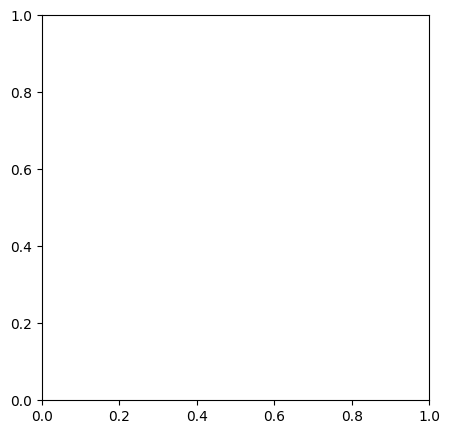

In [16]:
#directory = r"H:\phd stuff\tidy3d\output\anderson\Plots_for_Report_20240613\d(t)_analysis\data\0.37 - 0.44\Out"
#directory = r"H:\phd stuff\tidy3d\output\anderson\Plots_for_Report_20240613\d(t)_analysis\data\Output"
directory = r"H:\phd stuff\tidy3d\output\anderson\Plots_for_Report_20240613\d(t)_analysis\data\20240711\Out"
data_intensities = []
for k,filename in enumerate(natsorted(os.listdir(directory))):
    if not Path(filename).suffix==".h5":
        continue 
    print(filename)
    if os.path.isfile(os.path.join(directory, filename)):
        file=os.path.join(directory, filename)
        with h5py.File(file, 'r') as f:
            size_sample = 18.01
            coords_xy = np.linspace(-36,36,np.shape((f["field_time_out"])[()])[0])
            field_log_da = xr.DataArray((f["field_time_out"])[()], coords={"t": (f["times"])[()]*1e12,"x":coords_xy,"y":coords_xy,"z":0}, dims=["x", "y", "z", "t"])
            data_intensities += [{
                            "monitor":f["monitor"][()].decode('utf-8'),
                            "field_time_out":(f["field_time_out"])[()],
                            "times":(f["times"])[()],
                            "monitor_lambdas":(f["monitor_lambdas"])[()],
                            "file_name":f["file_name"][()].decode('utf-8'),
                            "diameter":diameter(field_log_da[:,:,0,:]),
                            "sigma_square":calculate_sigma(field_log_da[:,:,0,:]),
                            "size":size_sample
                         }]
            
            create_movie(field_log_da,data_intensities[k]["monitor_lambdas"],f"d(t)_{size_sample}_{data_intensities[k]["monitor_lambdas"][0]:.3g}-{data_intensities[k]["monitor_lambdas"][-1]:.3g} linear")
            break




In [ ]:
plt.figure(figsize=(15, 10))
for i,item in enumerate(data_intensities):
        if i == 0:
                l = 1.63
        else:
                l = 1
        if i <2:
                plt.plot(item["times"]*1e12/l ,np.sqrt(np.array(item["sigma_square"])),"o", label=f"$\\nu$' - {item["monitor_lambdas"][0]:.3g} - {item["monitor_lambdas"][-1]:.3g}")
                plt.ylabel("$\sigma$")
                plt.xlabel("Time[ps]")
                plt.title(f"$\sigma$ Out 72x72x{item["size"]}a ")
                plt.legend()
                plt.ylim(0,36)
                plt.grid()
       
#plt.savefig(f'{store_path}/Diameter_d(t)_center_90x90x11.7a.pdf', format='pdf')
plt.show()
   

In [ ]:
directory = r"H:\phd stuff\tidy3d\output\anderson\Plots_for_Report_20240613\d(t)_analysis\data\20240711\Out Freq\2"
data_intensities = []
for k,filename in enumerate(natsorted(os.listdir(directory))):
    if not Path(filename).suffix==".h5":
        continue 
    print(filename)
    if os.path.isfile(os.path.join(directory, filename)):
        file=os.path.join(directory, filename)
        with h5py.File(file, 'r') as f:
            size_sample = 18.01
            coords_xy = np.linspace(-36,36,np.shape((f["field_freq_out"])[()])[0])
            field_log_da = xr.DataArray((f["field_freq_out"])[()], coords={"f": (f["freqs"])[()]*1e12,"x":coords_xy,"y":coords_xy,"z":0}, dims=["x", "y", "z", "f"])
            data_intensities += [{
                            "monitor":f["monitor"][()].decode('utf-8'),
                            "field_freq_out":(f["field_freq_out"])[()],
                            "monitor_lambdas":(f["monitor_lambdas"])[()],
                            "file_name":f["file_name"][()].decode('utf-8'),
                            "diameter":diameter(field_log_da[:,:,0,:]),
                            "sigma_square":calculate_sigma(field_log_da[:,:,0,:]),
                            "size":size_sample
                         }]


In [ ]:
plt.figure(figsize=(15, 10))
for i,item in enumerate(data_intensities):
        
    plt.plot(item["monitor_lambdas"] ,np.sqrt(np.array(item["sigma_square"])),"o", label=f"$\\nu$' - {item["monitor_lambdas"][0]:.3g} - {item["monitor_lambdas"][-1]:.3g}")
    plt.ylabel("$\sigma$")
    plt.xlabel(r"$\nu$")
    plt.title(f"$\sigma$ Out 72x72x{item["size"]}a ")
    plt.legend()
    plt.ylim(0,36)
    plt.grid()
       
#plt.savefig(f'{store_path}/Diameter_d(t)_center_90x90x11.7a.pdf', format='pdf')
plt.show()
   